# Decision Trees and Random Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('csv/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [13]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc= DecisionTreeClassifier()

In [36]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
y_hat= dtc.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
print(accuracy_score(y_test,y_hat),
     '\n\n',
     confusion_matrix(y_test,y_hat),
     '\n\n',
     classification_report(y_test,y_hat))

0.64 

 [[15  4]
 [ 5  1]] 

               precision    recall  f1-score   support

      absent       0.75      0.79      0.77        19
     present       0.20      0.17      0.18         6

    accuracy                           0.64        25
   macro avg       0.47      0.48      0.48        25
weighted avg       0.62      0.64      0.63        25



In [40]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

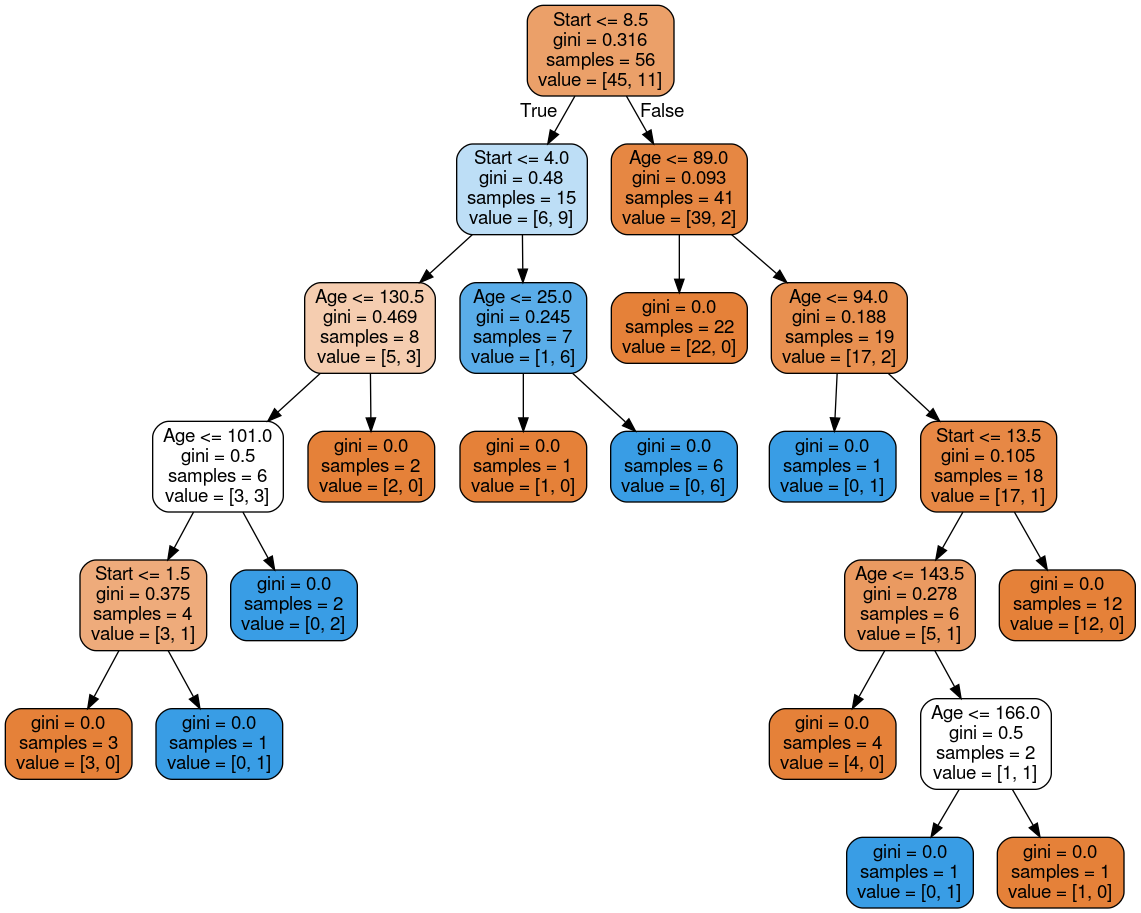

In [42]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_hat= rfc.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_hat),
     '\n\n',
     confusion_matrix(y_test,y_hat),
     '\n\n',
     classification_report(y_test,y_hat))

0.8 

 [[19  0]
 [ 5  1]] 

               precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



### IRIS

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris= load_iris()

In [49]:
data= pd.DataFrame(iris['data'],columns=iris['feature_names'])
target= pd.Series(iris['target'])

In [58]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/home/siavash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/siavash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


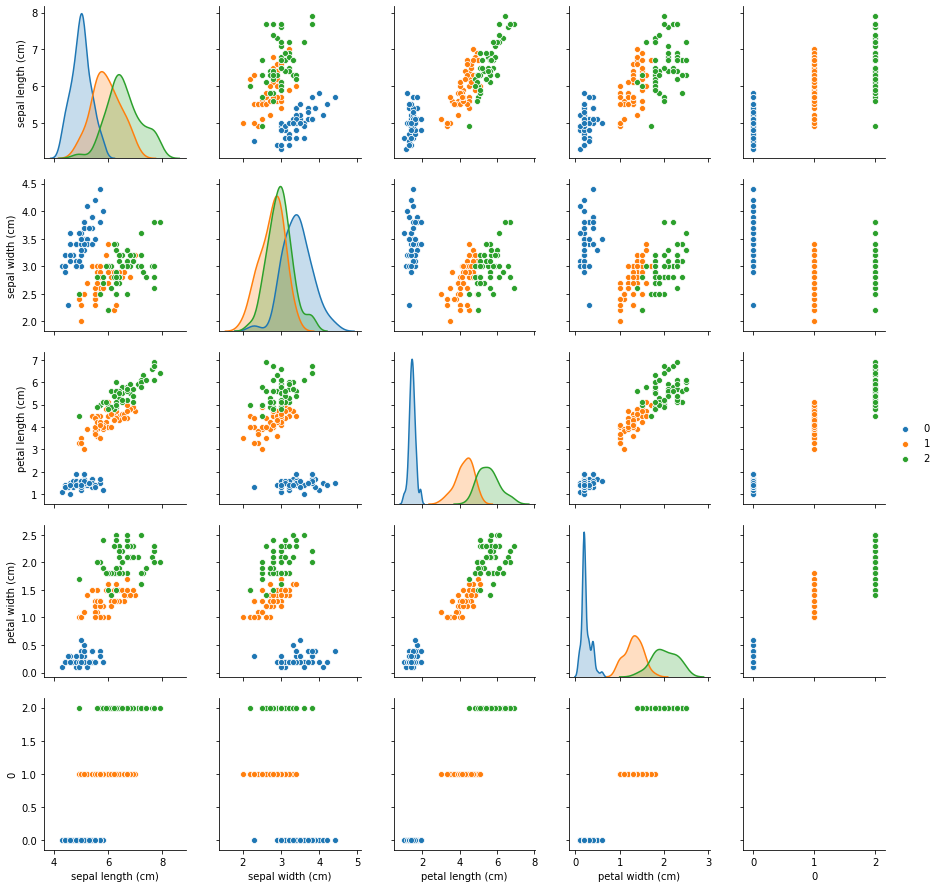

In [65]:
iris_t=pd.concat([data,target],axis=1)
sns.pairplot(iris_t,hue=0)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [75]:
dtree= DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
y_hat= dtree.predict(X_test)

In [78]:
print(accuracy_score(y_test,y_hat),
     '\n\n',
     confusion_matrix(y_test,y_hat),
     '\n\n',
     classification_report(y_test,y_hat))

0.9777777777777777 

 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]] 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [79]:
classification_report(y_test,y_hat,output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 '1': {'precision': 1.0,
  'recall': 0.9166666666666666,
  'f1-score': 0.9565217391304348,
  'support': 12},
 '2': {'precision': 0.9411764705882353,
  'recall': 1.0,
  'f1-score': 0.9696969696969697,
  'support': 16},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9803921568627452,
  'recall': 0.9722222222222222,
  'f1-score': 0.9754062362758015,
  'support': 45},
 'weighted avg': {'precision': 0.9790849673202615,
  'recall': 0.9777777777777777,
  'f1-score': 0.9776313863270385,
  'support': 45}}

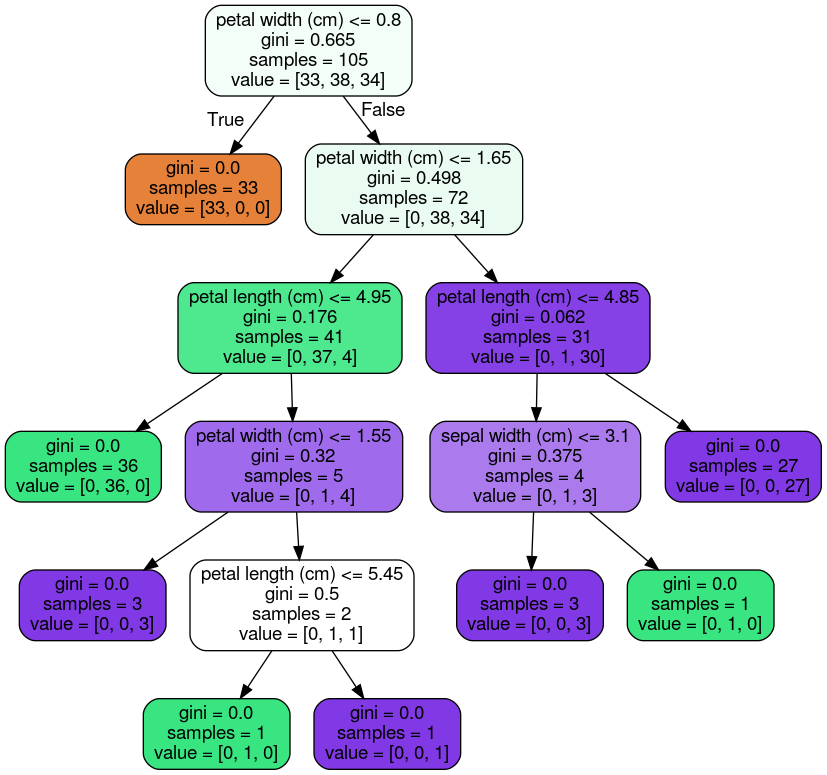

In [81]:

features = data.columns
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [80]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_hat= rfc.predict(X_test)


print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9777777777777777 
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

